In [39]:
import pandas as pd
from pandas import Series,DataFrame
import math
import os
import csv
import re
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from skimage import io, filters
import seaborn as sns
import PIL
from StringIO import StringIO

In [40]:
file_reader = csv.reader(open("cars.data.csv"),delimiter = ',', quoting = csv.QUOTE_NONE)

buying = list()
maint = list()
doors = list()
persons = list()
lug_boot = list()
safety = list()
category = list()

for line in file_reader:
    buying.append(line[0]) 
    maint.append(line[1]) 
    doors.append(line[2]) 
    persons.append(line[3]) 
    lug_boot.append(line[4]) 
    safety.append(line[5]) 
    category.append(line[6])

df = DataFrame()

df['buying'] =  buying
df['maint'] =  maint
df['doors'] =  doors
df['persons'] =  persons
df['lug_boot'] =  lug_boot
df['safety'] =  safety
df['category'] =  category

# Delete first row
df.drop(df.index[:1], inplace=True)
df.head()

,buying,maint,doors,persons,lug_boot,safety,category
1,high,high,4,more,small,high,acc
2,high,high,4,more,big,low,unacc
3,high,low,2,more,big,high,acc
4,vhigh,low,3,2,med,med,unacc
5,low,high,2,2,small,low,unacc


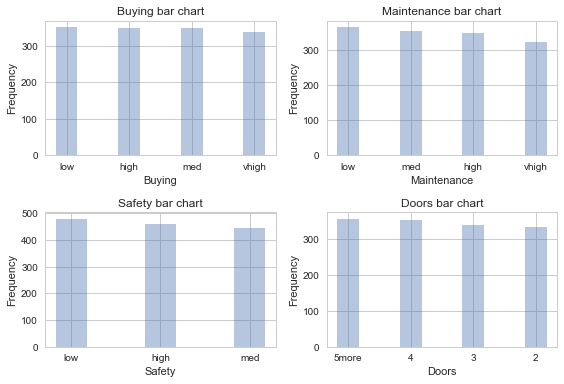

In [42]:
# Matplotlib barcharts for "Buying", "Doors", "Safety" and "Maintenance" in the cars data

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

# buying
buying1 = Series((df['buying']))
l = buying1.value_counts()
buying_levels =  list(l.index)
buying_counts = list(l.values)

p = range(1, len(buying_levels) + 1)
ax0.bar(p,buying_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[0, 0])
plt.xticks(p, buying_levels)
plt.xlabel('Buying')
plt.ylabel('Frequency')
plt.title('Buying bar chart')

# maintenance
l_maint = Series((df['maint']))
l = l_maint.value_counts()
maint_levels =  list(l.index)
maint_counts = list(l.values)
p = range(1, len(maint_levels) + 1)
ax1.bar(p,maint_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[0, 1])
plt.xticks(p, maint_levels)
plt.xlabel('Maintenance')
plt.ylabel('Frequency')
plt.title('Maintenance bar chart')

# safety
l_safety = Series((df['safety']))
l = l_safety.value_counts()
safety_levels =  list(l.index)
safety_counts = list(l.values)
p = range(1, len(safety_levels) + 1)
ax2.bar(p,safety_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[1, 0])
plt.xticks(p, safety_levels)
plt.xlabel('Safety')
plt.ylabel('Frequency')
plt.title('Safety bar chart')

# doors
l_doors = Series((df['doors']))
l = l_doors.value_counts()
doors_levels =  list(l.index)
doors_counts = list(l.values)
p = range(1, len(doors_levels) + 1)
ax3.bar(p,doors_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[1, 1])
plt.xticks(p, doors_levels)
plt.xlabel('Doors')
plt.ylabel('Frequency')
plt.title('Doors bar chart')

fig.tight_layout() 
plt.show()



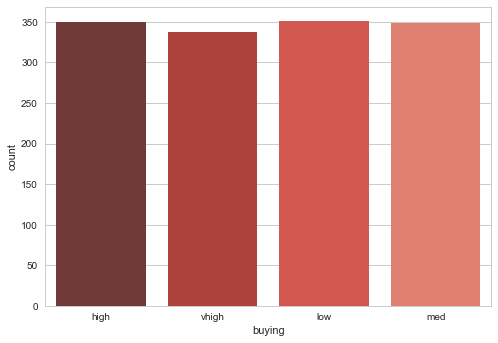

In [43]:
# Another Bar Plot using Seaborn Library
sns.set(style="whitegrid", color_codes=True)
# Restrict it to 5
df[:5]
b_plot = sns.countplot(x="buying", data=df, palette="Reds_d")
sns.plt.show()

In [44]:
fs = open("brainandbody.csv")
f_lines = fs.readlines()
fs.close()
l = [(i.rstrip("\n")).split(",") for i in f_lines]
body_l = list()
brain_l = list()

for j in range(1, len(l)):
    body_l.append(l[j][1])
    brain_l.append(l[j][2])

body_wt_arr = np.array(body_l)
brain_wt_arr = np.array(brain_l)
x = brain_wt_arr.astype(float)
y = body_wt_arr.astype(float)

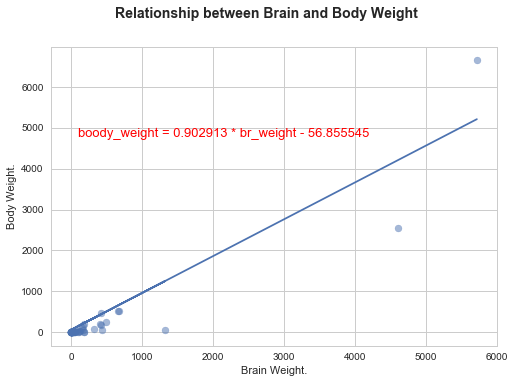

In [45]:
plt.scatter(x,y,alpha=0.5,)
plt.suptitle("Relationship between Brain and Body Weight",  fontsize=14, fontweight='bold')
plt.xlabel("Brain Weight.")
plt.ylabel("Body Weight.")
slope, intercept = np.polyfit(x,y,1)


if intercept > 0:
         eq = "body_wt = %f * brain_wt + %f" % (slope, intercept)
if intercept < 0:
        intercept = -1 * intercept
        eq = "boody_weight = %f * br_weight - %f" % (slope, intercept) 
if intercept == 0:
       eq = "body_weight = %f * brain_weight" % (slope) 


plt.plot(x,slope*x + intercept, '-')
plt.text(100, 5000, eq, horizontalalignment='left',verticalalignment='top', color='red', fontsize=13)
plt.show()

8 objects identified


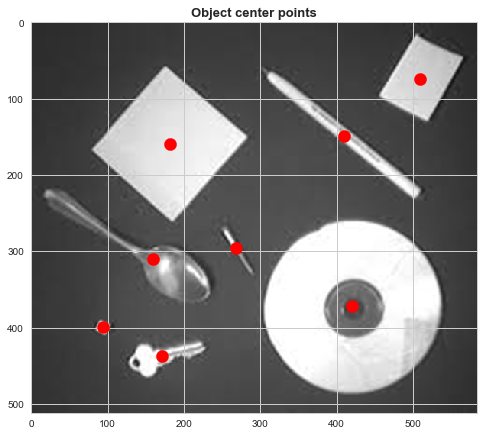

In [62]:
plt.rcParams['font.size'] = 12

# Reading the objects.png file
image = ndi.imread('objects.png')


# Apply Gaussian filter to make the image blurr
f_array = filters.gaussian(image, sigma = 2, multichannel=None)
# Futher filtering using mean value of the pixels
f_array = f_array > f_array.mean()

# Display Image
l = len(image.shape)
f_array[:] = ndi.binary_opening(f_array,np.ones((np.ones(l) * 2)))
f_array[:] = ndi.binary_closing(f_array,np.ones((np.ones(l) * 2)))

labels, count = ndi.label(f_array)
print '%s objects identified' % (count) # 8 objects identified

# Plot image with center of mass
fig, ax1 = plt.subplots(1, figsize=(8, 8))
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Object center points', fontsize=13, fontweight='bold')
t = ndi.measurements.center_of_mass(f_array, labels, list(range(1,count+1)))
t_array = np.array(t)
x = list(t_array[:,1])
y = list(t_array[:,0])
plt.scatter(x=x,y=y, color = 'red', s=150)


plt.show()

In [47]:
with open('data_ip.txt') as file:
    raw = file.read()
pattern = r'(\" )(?=HTTP)'  
fixed = re.sub(pattern, '', raw) 
df = pd.read_csv(StringIO(fixed), sep='\s+', header=None, na_values="-",
names = ['host', 'date', 'request', 'reply', 'bytes']) 

# clean for date to get hour
df['date'] = pd.to_datetime(df['date'], format='[%d:%H:%M:%S]')
df['hour'] = pd.DatetimeIndex(df['date']).hour
del df['date']
df.head(5)


,host,request,reply,bytes,hour
0,141.243.1.172,GET /Software.html HTTP/1.0,200,1497.0,23
1,query2.lycos.cs.cmu.edu,GET /Consumer.html HTTP/1.0,200,1325.0,23
2,tanuki.twics.com,GET /News.html HTTP/1.0,200,1014.0,23
3,wpbfl2-45.gate.net,GET / HTTP/1.0,200,4889.0,23
4,wpbfl2-45.gate.net,GET /icons/circle_logo_small.gif HTTP/1.0,200,2624.0,23


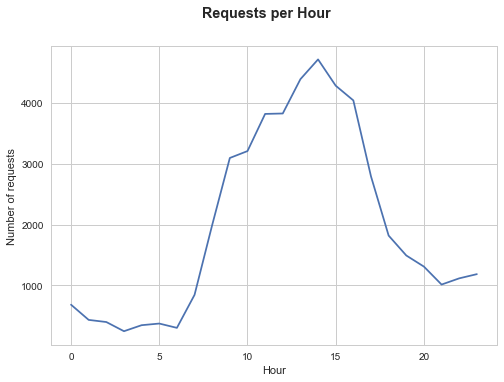

In [56]:
hourlyReq = pd.Series(df['hour'])
hourlyReq = hourly.value_counts()
hourlyReq = hourly.sort_index()

fig, ax = plt.subplots()
fig.suptitle("Requests per Hour", fontweight='bold')
ax.plot(hourlyReq)
plt.xlabel("Hour")
plt.ylabel("Number of requests")
plt.show()
